# Método Runge-Kutta

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/caramirezs/MetNum_POLI\4.2_Runge-Kutta.ipynb)

In [85]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt

def KR1(f, to, yo, tf, n=10):
    t=np.linspace(to,tf,n+1)
    y=[yo]
    h= (tf-to)/n
    for i in range(1,n+1):
        # Función de crecimiento
        a_1 = 1
        k_1 = f(t[i-1], y[i-1])
        phi = a_1*k_1
        #----------------------
        yi = y[i-1] + phi*h
        y.append(yi)
    return t,y

def KR2(f, to, yo, tf, n=10):
    t=np.linspace(to,tf,n+1)
    y=[yo]
    h= (tf-to)/n
    for i in range(1,n+1):
        # Función de crecimiento
        a_1, a_2 = 0.5, 0.5
        p_1 = 1
        q_11 = 1
        k_1 = f(t[i-1], y[i-1])
        k_2 = f(t[i-1] + p_1*h, y[i-1] + q_11*k_1*h)
        phi = a_1*k_1 + a_2*k_2
        #----------------------
        yi = y[i-1] + phi*h
        y.append(yi)
    return t,y

def KR3(f, to, yo, tf, n=10):
    t=np.linspace(to,tf,n+1)
    y=[yo]
    h= (tf-to)/n
    for i in range(1,n+1):
        # Función de crecimiento
        a_1, a_2 , a_3 = 1/6, 2/3, 1/6
        p_1, p_2 = 1/2, 1
        q_11, q_21, q_22 = 1/2, -1, 2
        k_1 = f(t[i-1], y[i-1])
        k_2 = f(t[i-1] + p_1*h, y[i-1] + q_11*k_1*h)
        k_3 = f(t[i-1] + p_1*h, y[i-1] + q_21*k_1*h + q_22*k_2*h)
        phi = a_1*k_1 + a_2*k_2 + a_3*k_3
        #----------------------
        yi = y[i-1] + phi*h
        y.append(yi)
    return t,y

def KR4(f, to, yo, tf, n=10):
    t=np.linspace(to,tf,n+1)
    y=[yo]
    h= (tf-to)/n
    for i in range(1,n+1):
        # Función de crecimiento
        k_1 = f(t[i-1], y[i-1])
        k_2 = f(t[i-1] + h/2, y[i-1] + (k_1*h)/2)
        k_3 = f(t[i-1] + h/2, y[i-1] + (k_2*h)/2)
        k_4 = f(t[i-1] + h, y[i-1] + k_3*h)
        phi = (1/6)*(k_1 + 2*k_2 + 2*k_3 + k_4)
        #----------------------
        yi = y[i-1] + phi*h
        y.append(yi)
    return t,y

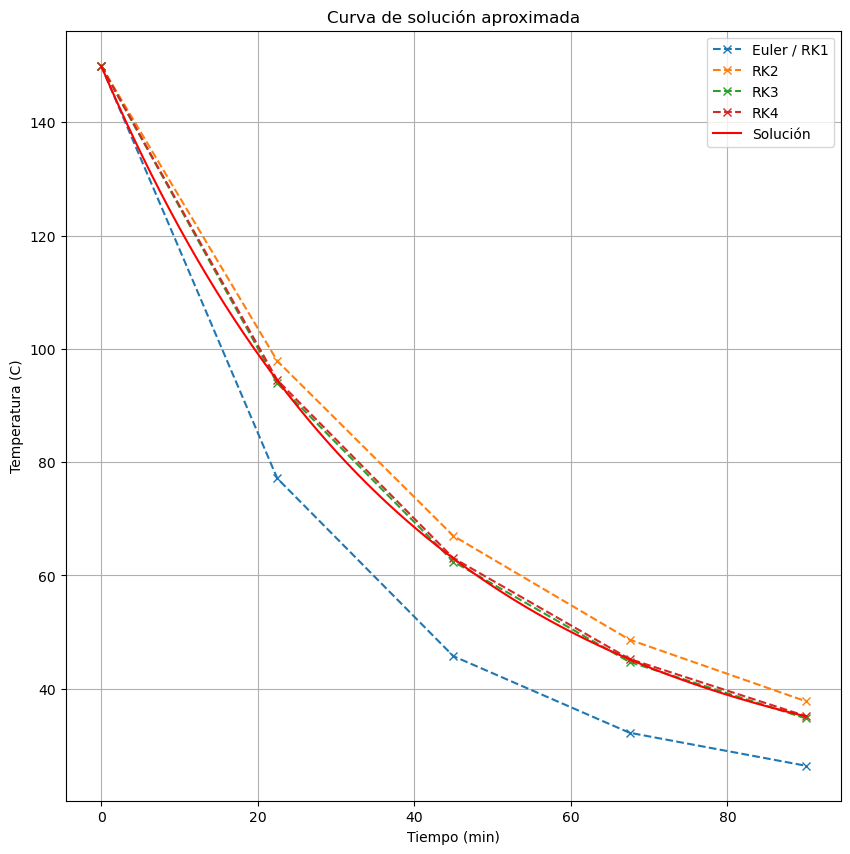

In [105]:
k = -0.0253
func = lambda t, y: k*(y-22)
to = 0
tf = 60*1.5
yo = 150
n = 4
t,y = KR1(func,to,yo,tf, n)
t2,y2 = KR2(func,to,yo,tf, n)
t3,y3 = KR3(func,to,yo,tf, n)
t4,y4 = KR4(func,to,yo,tf, n)
fig = plt.figure(figsize=(10, 10))
plt.plot(t,y, 'x--', label='Euler / RK1')
plt.plot(t2,y2, 'x--', label='RK2')
plt.plot(t3,y3, 'x--', label='RK3')
plt.plot(t4,y4, 'x--', label='RK4')

# Si se tiene la curva solución
t_l = linspace(to , tf, 1000)
y_sol = lambda t: 22*np.exp(k*t)*(5.818181818181818 + np.exp(-k*t))
plt.plot(t_l,y_sol(t_l), 'r', label='Solución')
# # # # # # # # # # # #

plt.title("Curva de solución aproximada")
plt.grid(True)
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (C)')
plt.legend()
plt.show()

In [107]:
y_real = y_sol(t)
np.array([t,y_real,y, y2, y3, y4]).T

array([[  0.        , 150.        , 150.        , 150.        ,
        150.        , 150.        ],
       [ 22.5       ,  94.44156696,  77.136     ,  97.874916  ,
         93.93970669,  94.49973616],
       [ 45.        ,  62.99828612,  45.749832  ,  66.97658498,
         62.43219843,  63.06415425],
       [ 67.5       ,  45.20296945,  32.23024013,  48.66089537,
         44.72406637,  45.25890898],
       [ 90.        ,  35.13171457,  26.40667594,  37.8038531 ,
         34.77158336,  35.17394347]])

In [108]:
np.array([t, abs(y-y_real), abs(y2-y_real), abs(y3-y_real), abs(y4-y_real)]).T

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [2.25000000e+01, 1.73055670e+01, 3.43334904e+00, 5.01860271e-01,
        5.81692044e-02],
       [4.50000000e+01, 1.72484541e+01, 3.97829886e+00, 5.66087696e-01,
        6.58681273e-02],
       [6.75000000e+01, 1.29727293e+01, 3.45792592e+00, 4.78903076e-01,
        5.59395276e-02],
       [9.00000000e+01, 8.72503863e+00, 2.67213853e+00, 3.60131214e-01,
        4.22289005e-02]])